# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

* ## IMPORTATION DES DONNEES

In [3]:
data = pd.read_excel("makeorg_sport.xlsx")
data_insee = pd.read_excel("Pyra2024.xlsx")
data_insee = data_insee.drop([0,1,2,3,4]).reset_index(drop=True)

##  STATISTIQUES DESCRIPTIVES

In [4]:
print(data_insee)

    Pyramide des âges au 1er janvier 2024, France   Unnamed: 1 Unnamed: 2  \
0                                            2023            0     324842   
1                                            2022            1     350041   
2                                            2021            2     359212   
3                                            2020            3     358872   
4                                            2019            4     374866   
..                                            ...          ...        ...   
97                                           1926           97       7851   
98                                           1925           98       4959   
99                                           1924           99       3112   
100                                 1923 ou avant  100 ou plus       4647   
101                                         Total          NaN   33117745   

    Unnamed: 3 Unnamed: 4  
0       310704     635546  
1       335003     

In [5]:
print(data.describe())

               Âge  Département  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre  
count  1909.000000  1909.000000  
mean      0.168306     0.209935  
std       0.110576     0.092298  
min       0.012000     0.020000  
25%       0.090000     0.148000  
50%       0.142000     0.194000  
75%       0.220000     0.260000  
max       0.816000     0.815000  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Proposition      1909 non-null   object 
 1   Nom d'auteur     1909 non-null   object 
 2   Âge              1516 non-null   float64
 3   Département      999 non-null    float64
 4   Zone d'adhésion  1909 non-null   object 
 5   Nb de votes      1909 non-null   int64  
 6   Zone score       1909 non-null   float64
 7   % pour           1909 non-null   float64
 8   % contre         1909 non-null   float64
 9   % neutre         1909 non-null   float64
 10  Id               1909 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 164.2+ KB
None


* Nombre de mots par propositions

In [5]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df 
# Afficher le résultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des données manquantes

In [6]:
# Visualisation des données manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
Âge                393
Département        910
Zone d'adhésion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
nb_de_mots           0
dtype: int64


In [7]:
# Proportion des données manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
Âge                20.586695
Département        47.668937
Zone d'adhésion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
nb_de_mots          0.000000
dtype: float64


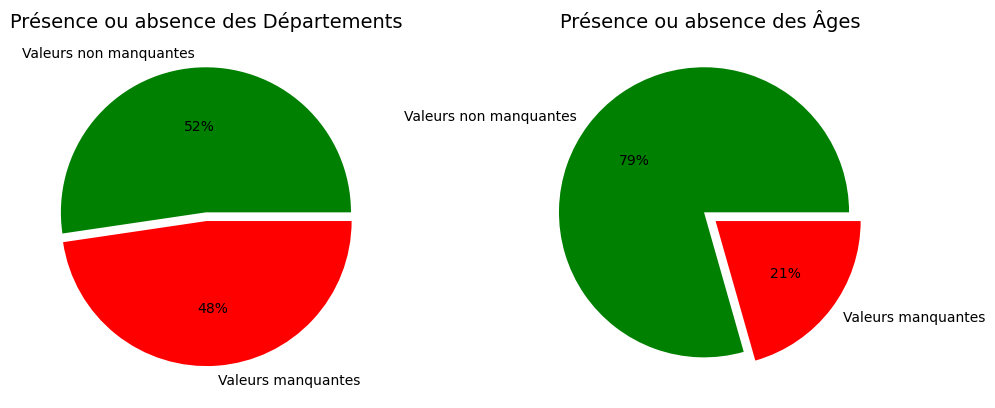

In [8]:
# Création de la figure avec deux sous-graphiques côte à côte
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalisée

# Données et paramètres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['Département'].notnull().value_counts()

# Premier graphique (Présence ou absence des Départements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Présence ou absence des Départements", fontsize=14)

# Données et paramètres pour le deuxième graphique
explode = [0.05, 0.05]
bdd1 = data['Âge'].notnull().value_counts()

# Deuxième graphique (Présence ou absence des Âges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Présence ou absence des Âges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\876220517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'proportion')


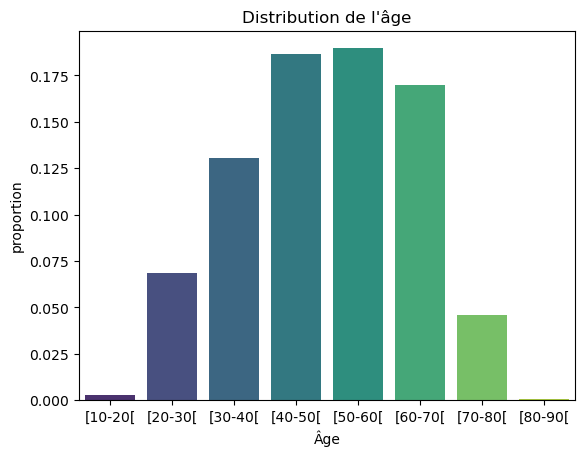

In [9]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90[']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'proportion')
plt.title('Distribution de l\'âge')
plt.show()

In [10]:
#Pour tracer le graphe

data1 = pd.ExcelFile("Pyra2024.xlsx")

df_france = data1.parse("2024 - France")

df_france.head()

df_clean = data1.parse("2024 - France", skiprows=4)

df_clean.columns = ["Année de naissance", "Âge révolu", "Nombre d'hommes", "Nombre de femmes", "Ensemble"]

df_clean = df_clean.dropna(subset=["Âge révolu", "Ensemble"])

df_clean.head()

df_clean = df_clean[df_clean["Âge révolu"] != "Âge révolu"]

df_clean["Âge révolu"] = pd.to_numeric(df_clean["Âge révolu"], errors='coerce')

df_clean["Ensemble"] = pd.to_numeric(df_clean["Ensemble"], errors='coerce')

df_clean = df_clean.dropna()

# Filtrer la population française sur la plage 12-87 ans

df_filtered = df_clean[(df_clean["Âge révolu"] >= 12) & (df_clean["Âge révolu"] <= 87)]

 

# Calculer les effectifs pour chaque âge

ages_french_population = df_filtered["Âge révolu"]

counts_french_population = df_filtered["Ensemble"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\3674586847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\3674586847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


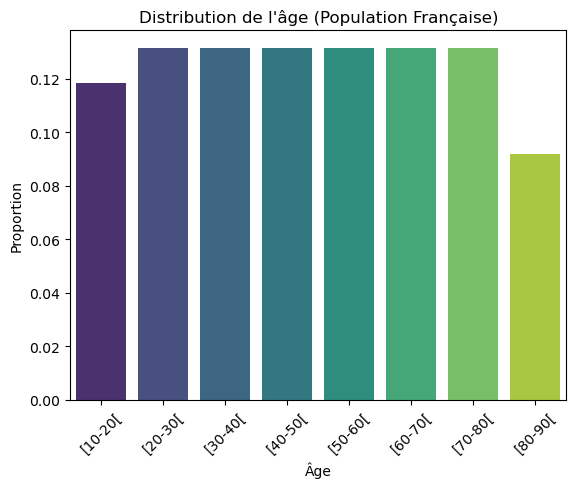

In [11]:
# Définir les intervalles et les labels

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[', '[80-90[']

 

# Ajouter une colonne de catégories d'âge

df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)

 

# Tracer le graphique de proportion

sns.countplot(

    x=df_filtered["Catégories"],

    palette='viridis',

    order=labels,

    stat='proportion'

)

plt.title("Distribution de l'âge (Population Française)")

plt.xlabel("Âge")

plt.ylabel("Proportion")

plt.xticks(rotation=45)

plt.show()


In [12]:
#test de khi 2


from scipy.stats import chisquare

df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)

france_counts = df_filtered["Catégories"].value_counts()

france_proportions = france_counts / france_counts.sum()  # Proportions normalisées


# Échantillon : calcul des proportions pour chaque catégorie

sample_counts = pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False).value_counts()

sample_proportions = sample_counts / sample_counts.sum()  # Proportions normalisées

 

# Test du chi²

chi2_stat, p_value = chisquare(f_obs=sample_proportions, f_exp=france_proportions)

 

# Résultats

chi2_stat, p_value

C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\660734910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)


(0.4870637423567994, 0.9994924835718528)

In [15]:


# #Zoom sur le graphe de distribution des votes

 

# Identifier l'index de la barre la plus longue

# max_count_index = np.argmax(counts)

# max_bin_start = bin_edges[max_count_index]

# max_bin_end = bin_edges[max_count_index + 1]

# filtered_values = values[(values >= max_bin_start) & (values < max_bin_end)]

 

# Recalculer un histogramme avec des bins plus fins sur cette plage

# fine_bins = 10 

# fine_counts, fine_bin_edges = np.histogram(filtered_values, bins=fine_bins)

 

# plt.figure(figsize=(8, 5))

# plt.bar(fine_bin_edges[:-1], fine_counts, width=np.diff(fine_bin_edges), edgecolor='black', align='edge', color='orange')

# plt.xlim(max_bin_start, max_bin_end) 

# plt.ylim(0, fine_counts.max() * 1.1) 

# plt.title("Zoom sur la barre la plus longue")

# plt.xlabel("Nombre de votes")

# plt.ylabel("Fréquence")

# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

In [14]:
# Sélectionner les colonnes pertinentes : 'Âge révolu' et 'Ensemble' (Total)
df_insee_clean = data_insee[['Unnamed: 1', 'Unnamed: 4']]

# Nettoyer les données (enlever les lignes inutiles comme 'Total')
df_insee_clean = df_insee_clean.dropna()
import pandas as pd

# Convertir les âges et les nombres en types numériques
df_insee_clean['Âge révolu'] = pd.to_numeric(df_insee_clean['Unnamed: 1'], errors='coerce')
df_insee_clean['Ensemble'] = pd.to_numeric(df_insee_clean['Unnamed: 4'], errors='coerce')

# Supprimer les lignes où les données sont manquantes après conversion
df_insee_clean = df_insee_clean.dropna()

# Définir les bornes des classes d'âge, ici de 0 à 99 avec des tranches de 10 ans
bins = list(range(10, 90, 10)) + [np.inf]  # Ajout de +inf pour la classe "100+"

# Nom des classes d'âge
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Utiliser pd.cut pour diviser l'âge révolu en classes
df_insee_clean['Classe d\'âge'] = pd.cut(df_insee_clean['Âge révolu'], bins=bins, labels=labels, right=False)

# Calculer la somme des effectifs par classe d'âge
df_age_groups = df_insee_clean.groupby('Classe d\'âge')['Ensemble'].sum().reset_index()

# Afficher le résultat
print(df_age_groups)

# Normaliser les données de l'INSEE pour avoir des proportions
#population_insee_normalized = population_insee / population_insee.sum()

# Afficher les données nettoyées et normalisées
#print("Classes d'âge de l'INSEE:", age_classes_insee)
#print("Distribution normalisée de l'INSEE:", population_insee_normalized)

  Classe d'âge  Ensemble
0        10-19   8550774
1        20-29   7746107
2        30-39   8272007
3        40-49   8474040
4        50-59   8965690
5        60-69   8193149
6        70-79   6653685
7          80+   4108835


C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\2658752594.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_groups = df_insee_clean.groupby('Classe d\'âge')['Ensemble'].sum().reset_index()


In [15]:
df_participants = data['Âge']
df_participants['Classe d\'âge'] = pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False)
# Compter les effectifs par classe d'âge
age_distribution_participants = df_participants['Classe d\'âge'].value_counts().sort_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14872\4244834141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participants['Classe d\'âge'] = pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False)


In [16]:
# Effectifs des classes d'âge des participants
observed = age_distribution_participants.values#/age_distribution_participants.values.sum()

# Effectifs des classes d'âge de la population française (INSEE)
expected = df_age_groups['Ensemble'].values #/ df_age_groups['Ensemble'].values.sum()

# Normaliser les effectifs de l'INSEE pour qu'ils aient la même somme que les participants
#expected = expected * (observed.sum() / expected.sum())

# Vérifier les valeurs
print("Effectifs observés (participants) :", observed)
print("Effectifs attendus (INSEE normalisé) :", expected)


Effectifs observés (participants) : [  5 131 249 356 362 324  88   1]
Effectifs attendus (INSEE normalisé) : [8550774 7746107 8272007 8474040 8965690 8193149 6653685 4108835]


In [17]:
import scipy.stats as stats
import numpy as np

# Création d'un tableau de contingence
tableau_contingence = np.array([observed,  # participant
                                expected])  # Total

# Test du Chi² d'indépendance
chi2, p, dof, expect = stats.chi2_contingency(tableau_contingence)

# Résultats
print(f"Chi² : {chi2:.4f}")
print(f"P-valeur : {p:.4f}")
print(f"Degrés de liberté : {dof}")
print(f"Tableau attendu :\n{expect}")

# Interprétation
alpha = 0.05
if p < alpha:
    print("On rejette H0 : Il existe une relation entre les deux variables.")
else:
    print("On ne rejette pas H0 : Aucune relation significative n'est détectée.")


Chi² : 625.8761
P-valeur : 0.0000
Degrés de liberté : 7
Tableau attendu :
[[2.12627085e+02 1.92621047e+02 2.05701221e+02 2.10727715e+02
  2.22953429e+02 2.03742171e+02 1.65455376e+02 1.02171957e+02]
 [8.55056637e+06 7.74604538e+06 8.27205030e+06 8.47418527e+06
  8.96582905e+06 8.19326926e+06 6.65360754e+06 4.10873383e+06]]
On rejette H0 : Il existe une relation entre les deux variables.


In [18]:
import numpy as np
from scipy.stats import chisquare

# Vérification des sommes initiales
print(f"Somme des observés : {observed.sum()}")
print(f"Somme des attendus : {expected.sum()}")

# Normalisation des effectifs attendus
expected_adjusted = expected / expected.sum()
observed_adjusted = observed / observed.sum()

# Vérification après ajustement
print(f"Somme des attendus ajustés : {expected_adjusted.sum()}")  

# Test du Khi²
chi2_stat, p_value = chisquare(f_obs=observed_adjusted, f_exp=expected_adjusted)

# Affichage des résultats
print(f"Statistique du Khi² : {chi2_stat:.2f}")
print(f"Valeur-p : {p_value:.4f}")


Somme des observés : 1516
Somme des attendus : 60964287
Somme des attendus ajustés : 1.0
Statistique du Khi² : 0.41
Valeur-p : 0.9997


* ## Distribution du nombre de vote par proposition

C:\Users\DELL\AppData\Local\Temp\ipykernel_13148\2795427885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')


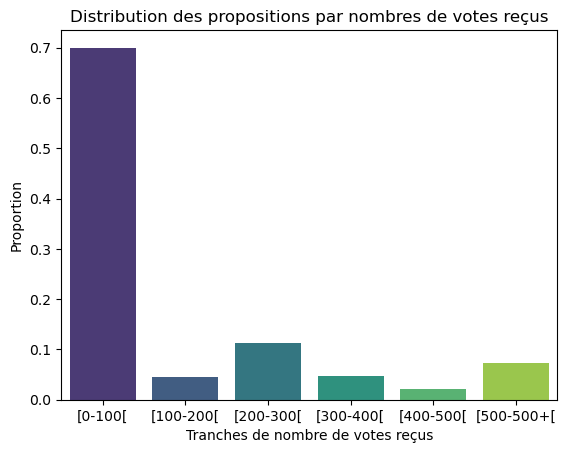

In [21]:
# Définir les intervalles et les étiquettes
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Limites des intervalles
labels = ['[0-100[', '[100-200[', '[200-300[', '[300-400[', '[400-500[', '[500-500+[']  # Noms des catégories

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes reçus')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13148\2799486795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')


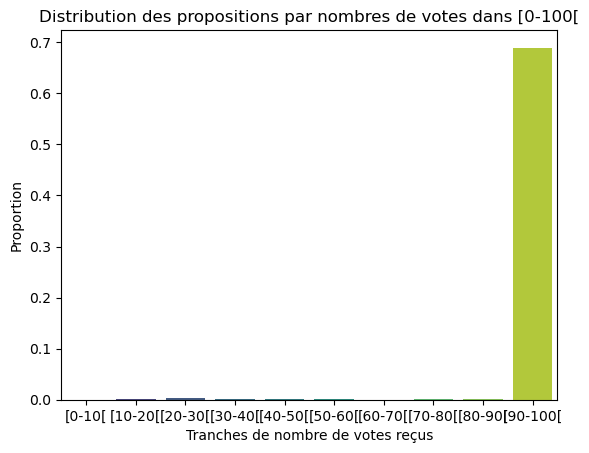

In [22]:
# Définir les intervalles et les étiquettes
bins = [0,10,20,30,40,50,60,70,80,90,100]  # Limites des intervalles
labels = ['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[','[90-100[']  # Noms des catégories

# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data, x='Nb de votes',bins=bins, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion',cbar=True)
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')
#plt.xticks(ticks=np.arange(0,101,10))
# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [0-100[')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13148\3142412916.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




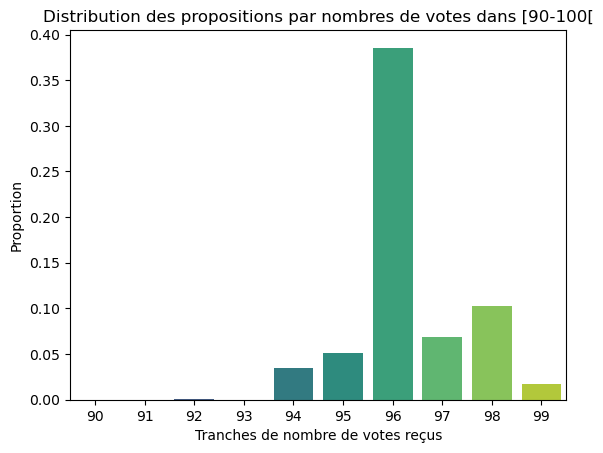

In [79]:
# Définir les intervalles et les étiquettes
bin = [89,90,91,92,93,94,95,96,97,98,99]  # Limites des intervalles
labels = ['90','91','92','93','94','95','96','97','98','99']  # Noms des catégories
#plt.xticks(ticks=np.arange(90,101,1))
# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data,x='Nb de votes',bins=bin, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion')
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=False),
              palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [90-100[')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

In [80]:
votes96 = (data['Nb de votes'] == 96).sum() / len(data)
print(votes96)

0.3855421686746988


* ## Analyse des votes

C:\Users\DELL\AppData\Local\Temp\ipykernel_13148\2954990707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')


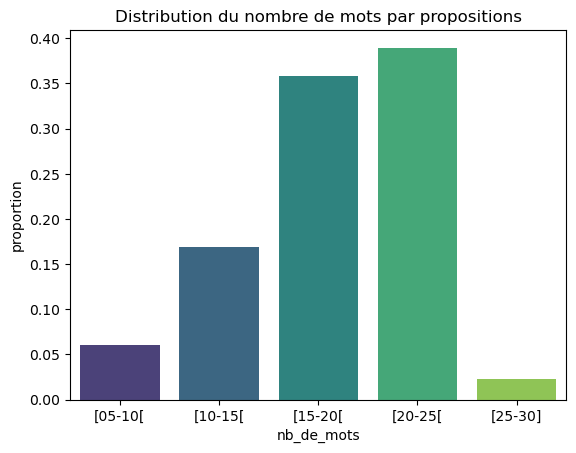

In [24]:
bins = [5,10,15,20,25,30]  # Limites des intervalles
labels = ['[05-10[','[10-15[', '[15-20[', '[20-25[','[25-30]']

sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

In [81]:
# Fonction pour déterminer la catégorie dominante
def get_dominant_category(row):
    if row['% pour'] > row['% contre'] and row['% pour'] > row['% neutre']:
        if row['% pour'] >0.5:
            return 'pour'
        else :
            return 'polémique'
    elif row['% contre'] > row['% pour'] and row['% contre'] > row['% neutre']:
        if row['% contre'] >0.5:
            return 'contre'
        else :
            return 'polémique'
    else:
        if row['% neutre'] >0.5:
            return 'neutre'
        else :
            return 'polémique'

# Ajouter une nouvelle colonne
data['Catégorie'] = data.apply(get_dominant_category, axis=1)

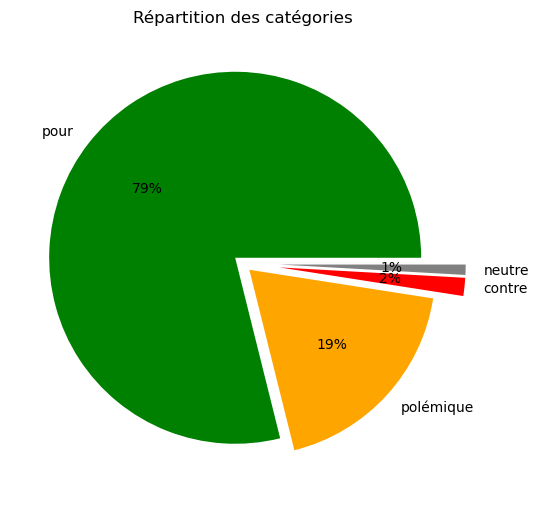

In [82]:
import matplotlib.pyplot as plt

# Calculer les proportions pour chaque catégorie
proportions = data['Catégorie'].value_counts(normalize=True)  # Proportions (%)
categories = proportions.index  # Les catégories
values = proportions.values  # Les proportions

# Paramètres du graphique
explode = [0.05] * (len(categories) - 2) + [0.2, 0.2]  # Sépare chaque tranche légèrement
labels = categories  # Labels provenant des catégories
colors = ['green','orange', 'red', 'grey'][:len(categories)]  # Limiter les couleurs à la taille des catégories

# Dessiner le camembert
plt.figure(figsize=(6,12))  # Ajuster la taille
plt.pie(
    values, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
plt.title("Répartition des catégories")
plt.show()


* ## Distribution moyenne des types de vote

* ## Categorisation des propositions

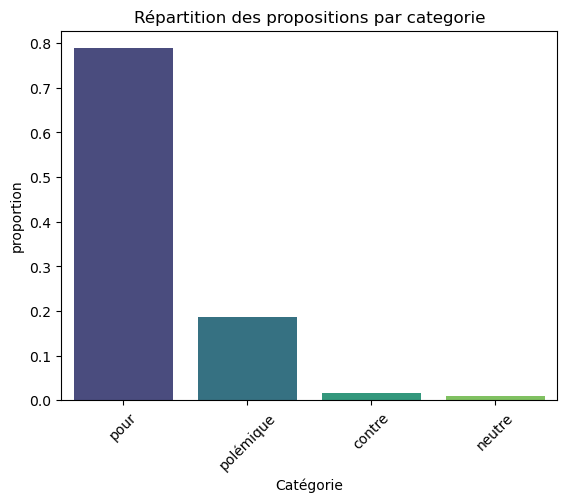

In [83]:
sns.countplot(data=data, x='Catégorie', palette='viridis', hue = "Catégorie",stat="proportion")
plt.title('Répartition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adhésion

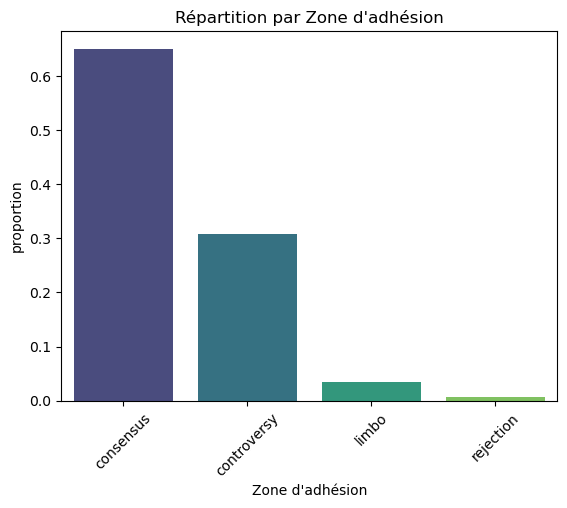

In [30]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Zone d\'adhésion",stat='proportion')
plt.title('Répartition par Zone d\'adhésion')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fréquents dans les propositions (sans nettoyage initial).

In [84]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('à', 727), ('le', 717), ('la', 688)]


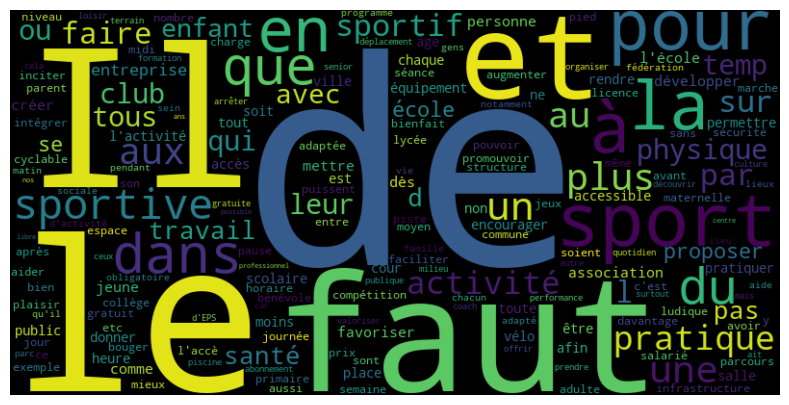

In [32]:
# Générer un nuage de mots à partir des propositions pour visualiser les mots les plus fréquents
# On fusionne toutes les propositions en une seule chaîne de caractères
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black",
                      prefer_horizontal=1.0,collocations=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Prétraitement des données textuelles

In [85]:
import unicodedata

def remove_accents(text):
    # Normalise le texte en supprimant les accents
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(char for char in text if not unicodedata.combining(char))
    return text


In [86]:
import spacy
nlp = spacy.load("fr_core_news_sm") 
def preprocess_with_spacy(text):
    # Analyser le texte avec spaCy
    doc = nlp(text.lower())  # Mise en minuscule
    cleaned_tokens = []
    mots_inutils = ['faire','falloir','tous','sport','etre','sportif']
    for token in doc:
        if not token.is_stop and token.is_alpha and token.lemma_ not in mots_inutils:  # Exclure stopwords et non-alphabetiques
            cleaned_tokens.append(remove_accents(token.lemma_))  # Ajouter la forme lemmatisée du mot

    return " ".join(cleaned_tokens)
# Nettoyer les propositions
data['cleaned_propositions'] = data['Proposition'].apply(preprocess_with_spacy)

In [35]:
print(data['cleaned_propositions'])

0       sensibiliser enfant jeune age ecole maternel p...
1       commune faciliter marche ville amenager itiner...
2       ecole lien sante demontrer jeune meilleur moye...
3       rigoureux enfance etat esprit bienveillant dro...
4       permettre handicap souhaiter rencontrer struct...
                              ...                        
1904        adopter chien minimum minute marche fois jour
1905    pouvoir exclure membre federation resultat evi...
1906      reduire nombre arret bus ville obliger marche m
1907    inciter francais equiper montre connecter stim...
1908       encourager garcon inscrire club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Statistique descriptive des prpositions nettoyées

In [36]:
nb_mots = [len(proposition.split()) for proposition in data["cleaned_propositions"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
# Afficher le résultat dans un format similaire
print(df.describe())

count    1909.000000
mean        7.778418
std         2.297715
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        14.000000
dtype: float64


* ## Les mots les plus frequents

In [37]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('activite', 295), ('pratique', 241), ('ecole', 211), ('physique', 165), ('temps', 159), ('club', 156), ('proposer', 148), ('enfant', 142), ('sante', 127), ('travail', 126), ('entreprise', 122), ('developper', 113), ('favoriser', 109), ('association', 107), ('mettre', 105), ('creer', 102), ('jeune', 96), ('permettre', 96), ('pouvoir', 94), ('age', 91)]


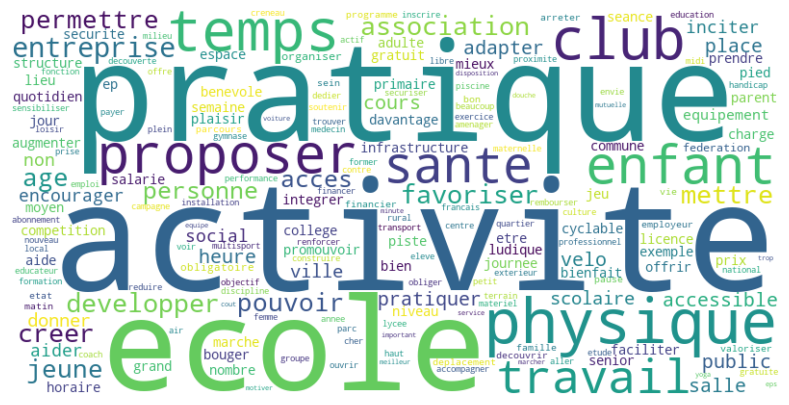

In [56]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      prefer_horizontal=1.0,collocations=False,normalize_plurals=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Modélisation des thématiques avec Word2Vec

In [49]:
# pip install --upgrade scipy gensim
# pip install gensim

In [50]:
from gensim.models import Word2Vec # Bibliothèque pour entraîner des modèles Word2Vec

In [63]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=1, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("club"))


[('association', 0.9994154572486877), ('accessible', 0.9993364214897156), ('cher', 0.9993264079093933), ('salle', 0.9992985725402832), ('offrir', 0.9992932677268982), ('aider', 0.9992914199829102), ('famille', 0.9992905855178833), ('inscription', 0.9992789626121521), ('creer', 0.999260663986206), ('qualite', 0.9992539286613464)]


* # Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)

In [52]:
# Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=2)


* ## Optimisation des hyperparametres

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fonction d'évaluation basée sur des paires de mots
def evaluate_model(word2vec_model, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
            sim = cosine_similarity(
                [word2vec_model.wv[word1]], 
                [word2vec_model.wv[word2]]
            )[0][0]
            similarities.append(sim)
    return np.mean(similarities)


In [54]:
from itertools import combinations
mots = ['club','association','pratique','rural','cyclabe','activite','velo','ecole','entreprise']

# Générer toutes les paires uniques
word_pairs = list(combinations(mots, 2))



In [58]:
from gensim.models import Word2Vec
from itertools import product

# Définir les plages d'hyperparamètres
vector_sizes = [150, 200, 250,300]
windows = [5, 10, 14,17]
sgs = [0, 1]
min_counts = [1,2, 3, 5]

# Liste pour enregistrer les scores
results = []

# Combinaisons d'hyperparamètres
for vector_size, window, sg, min_count in product(vector_sizes, windows, sgs, min_counts):
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=10
    )
    score = evaluate_model(model, word_pairs)
    results.append({
        'vector_size': vector_size,
        'window': window,
        'sg': sg,
        'min_count': min_count,
        'score': score
    })

# Trier les résultats par score
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
print(sorted_results[:5])  # Top 5 combinaisons


[{'vector_size': 300, 'window': 14, 'sg': 0, 'min_count': 1, 'score': 0.99982995}, {'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 1, 'score': 0.9998289}, {'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 2, 'score': 0.9998222}, {'vector_size': 300, 'window': 14, 'sg': 0, 'min_count': 2, 'score': 0.9998158}, {'vector_size': 300, 'window': 10, 'sg': 0, 'min_count': 1, 'score': 0.99981445}]


In [ ]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical

# Définir les plages d'hyperparamètres
search_space = [
    Integer(50, 300),        # vector_size
    Integer(2, 15),          # window
    Categorical([0, 1]),     # sg
    Integer(1, 10),          # min_count
    Integer(5, 50)           # epochs
]

# Liste pour suivre les résultats
results = []

# Fonction d'objectif avec enregistrement des résultats
def train_word2vec(params):
    # Extraire les hyperparamètres
    vector_size, window, sg, min_count, epochs = params

    # Créer et entraîner le modèle Word2Vec
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=epochs
    )
    
    # Évaluer le modèle
    score = -evaluate_model(model, word_pairs)  # Minimiser le score négatif
    
    # Enregistrer les résultats
    results.append((params, score))
    
    return score

# Optimisation bayésienne
result = gp_minimize(
    func=train_word2vec,
    dimensions=search_space,
    n_calls=20,
    random_state=42
)

# Trier les résultats par score (croissant car on minimise)
sorted_results = sorted(results, key=lambda x: x[1])

# Afficher les 5 meilleurs paramètres
print("Top 5 configurations :")
for i, (params, score) in enumerate(sorted_results[:5]):
    print(f"Rank {i+1}: Params={params}, Score={score}")

# Afficher les meilleurs paramètres globaux
print("\nBest parameters (global): ", result.x)


Top 5 configurations :
Rank 1: Params=[196, 11, 0, 3, 9], Score=-0.99970543384552
Rank 2: Params=[239, 8, 0, 6, 6], Score=-0.9996546506881714
Rank 3: Params=[300, 2, 0, 1, 17], Score=-0.9991974234580994
Rank 4: Params=[245, 11, 0, 1, 17], Score=-0.9991851449012756
Rank 5: Params=[202, 13, 0, 5, 13], Score=-0.9991682767868042

Best parameters (global):  [196, 11, 0, 3, 9]


* # Analyse des thématiques

In [59]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [71]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=2, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("velo"))


[('deplacement', 0.9991728663444519), ('pied', 0.9990364909172058), ('securiser', 0.9989540576934814), ('voiture', 0.998906135559082), ('mobilite', 0.998849630355835), ('ville', 0.9988214373588562), ('rural', 0.9987745881080627), ('marche', 0.998740017414093), ('trajet', 0.9987030029296875), ('actif', 0.9986737370491028)]


* ## Analyse des mots

In [65]:
# Récupérer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
print(words)
print(vectors)

['activite', 'pratique', 'ecole', 'physique', 'temps', 'club', 'proposer', 'enfant', 'sante', 'travail', 'entreprise', 'developper', 'favoriser', 'association', 'mettre', 'creer', 'jeune', 'permettre', 'pouvoir', 'age', 'acces', 'personne', 'pratiquer', 'velo', 'place', 'salle', 'public', 'adapter', 'cours', 'heure', 'accessible', 'ville', 'scolaire', 'donner', 'aider', 'encourager', 'non', 'social', 'inciter', 'equipement', 'lieu', 'gratuit', 'integrer', 'faciliter', 'competition', 'espace', 'etre', 'primaire', 'semaine', 'college', 'jeu', 'prendre', 'commune', 'jour', 'horaire', 'augmenter', 'bien', 'infrastructure', 'benevole', 'niveau', 'aide', 'promouvoir', 'quotidien', 'adulte', 'pied', 'davantage', 'offrir', 'seance', 'journee', 'cyclable', 'ludique', 'salarie', 'structure', 'mieux', 'parent', 'securite', 'prix', 'ep', 'senior', 'grand', 'moyen', 'nombre', 'plaisir', 'bienfait', 'bouger', 'charge', 'exemple', 'licence', 'piste', 'federation', 'obligatoire', 'organiser', 'financi

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 50 dimensions avec t-SNE
# Réduction de dimension à 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Préparer les données pour le graphique
df = pd.DataFrame(vectors_pca_50, columns=['Dim1', 'Dim2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Afficher un aperçu des données
print(df.head())


ValueError: Shape of passed values is (2633, 50), indices imply (2633, 2)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction de dimension à 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# Réduction des vecteurs à 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)
# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Préparer les données pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df = pd.DataFrame(vectors_pca_50, columns=dim)  # Dimensions réduites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters
# Créer le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compréhensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])  # Dimensions réduites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Créer le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compréhensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


* ## Analyse des propositions

In [ ]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le modèle
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le modèle
        return np.zeros(model.vector_size)


In [ ]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [0.007742384, 0.16001976, -0.019371722, 0.0336...
1       [0.0076336386, 0.15125528, -0.019653384, 0.030...
2       [0.008451276, 0.15532517, -0.018816838, 0.0321...
3       [0.0056837546, 0.1417472, -0.018287208, 0.0309...
4       [0.008491076, 0.139459, -0.018259764, 0.027908...
                              ...                        
1904    [0.007324142, 0.15365405, -0.019932931, 0.0323...
1905    [0.0054511647, 0.14189716, -0.017425943, 0.029...
1906    [0.006125483, 0.14966592, -0.018576588, 0.0301...
1907    [0.007452739, 0.14521289, -0.019601807, 0.0303...
1908    [0.0075701936, 0.120964564, -0.015276077, 0.02...
Name: mean_vector, Length: 1909, dtype: object


In [ ]:
# Convertir les vecteurs en liste pour compatibilité avec kmeans
proposition_vectors = np.vstack(data['mean_vector'].values)
len(proposition_vectors)

1909

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction de dimension à 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_pca_50)
data['cluster'] = cluster

# Préparer les données pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_pca_50, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une épaisseur de 2
))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction de dimension à 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(word_vectors_2d, columns=('Dim1','Dim2'))
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une épaisseur de 2
))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarité entre les centroïdes des clusters
cos_sim_clusters = cosine_similarity(kmeans.cluster_centers_)

# Affichage des similarités entre clusters
print("Matrice de similarité cosinus entre clusters :")
print(cos_sim_clusters)


Matrice de similarité cosinus entre clusters :
[[ 0.99999976 -0.94051653 -0.36885467 -0.9389966   0.871273   -0.9817996
  -0.9455661   0.9082577   0.79863954 -0.9382685   0.8890361   0.91798675
   0.9765751  -0.94426054  0.2086323 ]
 [-0.94051653  1.0000001   0.61855906  0.99949175 -0.97983825  0.98285294
   0.9984303  -0.99420387 -0.95107734  0.9993712  -0.855912   -0.9660645
  -0.95804125  0.9993592  -0.34729233]
 [-0.36885467  0.61855906  1.0000002   0.61857015 -0.71595323  0.49813277
   0.59914523 -0.6742423  -0.76284283  0.6240898  -0.5137407  -0.54702055
  -0.375639    0.6094224  -0.7192319 ]
 [-0.9389966   0.99949175  0.61857015  1.         -0.98068845  0.9824792
   0.99866015 -0.9946943  -0.9527949   0.9992704  -0.8556705  -0.96446574
  -0.95691687  0.99919426 -0.34861854]
 [ 0.871273   -0.97983825 -0.71595323 -0.98068845  1.         -0.93905526
  -0.97873306  0.9939536   0.97216856 -0.98031336  0.8270255   0.91162103
   0.8947839  -0.97715384  0.38731402]
 [-0.9817996   0.9828

In [ ]:
#  Calcul de la matrice de similarité cosinus entre clusters
cluster_centers = kmeans.cluster_centers_
similarity_matrix = cosine_similarity(cluster_centers)

# Affichage des résultats
print("Matrice de similarité cosinus entre clusters :")
print(similarity_matrix)

# Fusion des clusters similaires (si similarity > 0.9)
threshold = 0.9
merged_clusters = {}
for i in range(n_clusters):
    merged_clusters[i] = [i]  # Initialiser chaque cluster avec lui-même
    for j in range(n_clusters):
        if i != j and similarity_matrix[i, j] > threshold:
            merged_clusters[i].append(j)

print("\nClusters fusionnés :")
print(merged_clusters)

Matrice de similarité cosinus entre clusters :
[[ 0.99999976 -0.94051653 -0.36885467 -0.9389966   0.871273   -0.9817996
  -0.9455661   0.9082577   0.79863954 -0.9382685   0.8890361   0.91798675
   0.9765751  -0.94426054  0.2086323 ]
 [-0.94051653  1.0000001   0.61855906  0.99949175 -0.97983825  0.98285294
   0.9984303  -0.99420387 -0.95107734  0.9993712  -0.855912   -0.9660645
  -0.95804125  0.9993592  -0.34729233]
 [-0.36885467  0.61855906  1.0000002   0.61857015 -0.71595323  0.49813277
   0.59914523 -0.6742423  -0.76284283  0.6240898  -0.5137407  -0.54702055
  -0.375639    0.6094224  -0.7192319 ]
 [-0.9389966   0.99949175  0.61857015  1.         -0.98068845  0.9824792
   0.99866015 -0.9946943  -0.9527949   0.9992704  -0.8556705  -0.96446574
  -0.95691687  0.99919426 -0.34861854]
 [ 0.871273   -0.97983825 -0.71595323 -0.98068845  1.         -0.93905526
  -0.97873306  0.9939536   0.97216856 -0.98031336  0.8270255   0.91162103
   0.8947839  -0.97715384  0.38731402]
 [-0.9817996   0.9828

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction de dimension à 50 avec PCA
# pca = PCA(n_components=50, random_state=42)
# vectors_pca_50 = pca.fit_transform(vectors_normalized)

# Réduction des vecteurs à 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_normalized)
data['cluster'] = cluster

# Préparer les données pour le graphique
dim = []
for i in range(1,301):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_normalized, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une épaisseur de 2
))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()
